<h1>Matplotlib Assignment</h1>

<h4>Scipy</h4>
<p>We have the min and max temperatures in a city in India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.</p>
<br>
<b>Task :</b>
<blockquote>
    <ol>
        <li>fitting it to the periodic function</li><br>
        <li>plot the fit<br>Data<br>Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25<br>Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18</li>
    </ol>
</blockquote>
<br>
<b>Expected Output :</b>
<center><img src='monthwise_temp.png' width=600></img></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(start= 1, stop= 13)

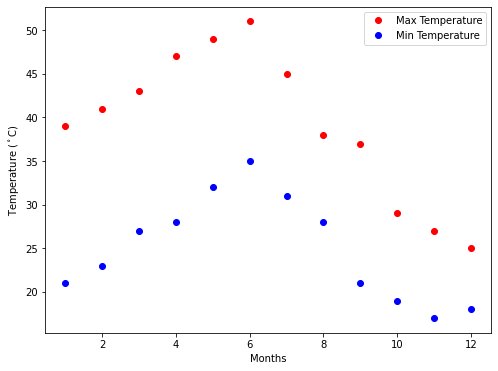

In [3]:
plt.figure(figsize= (8, 6))
plt.plot(months, max_temp, 'ro', c= 'r', label= 'Max Temperature')
plt.plot(months, min_temp, 'bo', c= 'b', label= 'Min Temperature')
plt.xlabel('Months')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend(loc= 'upper right')
plt.show()

<h2>Fitting it into a Periodic Function</h2>

In [4]:
from scipy import optimize

def yearly_temp(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temp, months, max_temp, [20, 10, 0])

res_min, cov_min = optimize.curve_fit(yearly_temp, months, min_temp, [-40, 20, 0])

<h3>Plotting the Fit</h3>

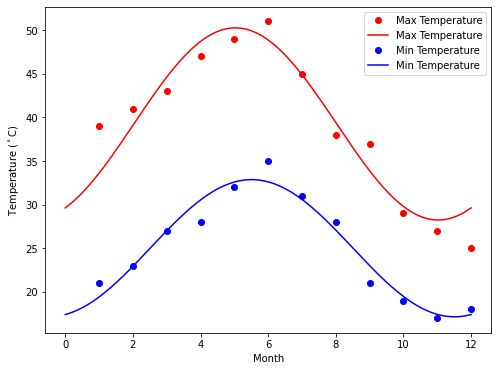

In [5]:
days = np.linspace(0, 12, num= 365)
fig = plt.figure(figsize= (8, 6))
plt.plot(months, max_temp, 'ro', label= 'Max Temperature')
plt.plot(days, yearly_temp(days, *res_max), 'r-', label= 'Max Temperature')
plt.plot(months, min_temp, 'bo', label= 'Min Temperature')
plt.plot(days, yearly_temp(days, *res_min), 'b-', label= 'Min Temperature')
plt.legend(loc= 'upper right')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()
# fig.savefig('monthwise_temp.png', dpi= 120)

---

<h2>Matplotlib</h2>
<p>This assignment is for visualization using matplotlib :<br><br>Data to use:<br>
    
https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv</p>

`
titanic = pd.read_csv(url)
`
<blockquote>Charts to plot :
    <ol>
        <li>Create a pie chart presenting the male / female proportion</li>
        <li>Create a scatterplot with the Fare paid and the Age, differ the plot colors by gender</li>
    </ol>
</blockquote>

In [6]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<h4>Question 1</h4>
<p><b>Create a pie chart presenting the male / female proportion</b></p>

In [7]:
males = titanic['sex'].value_counts()['male']
print('Males count : {}'.format(males))
females = titanic['sex'].value_counts()['female']
print('Females count : {}'.format(females))

Males count : 843
Females count : 466


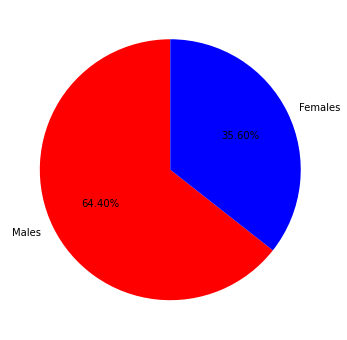

In [8]:
gender = [males, females]
gender_label = ['Males', 'Females']

plt.figure(figsize= (6, 6))
plt.pie(x= gender, labels= gender_label, colors= ['r', 'b'], startangle= 90, autopct= '%.2f%%')
plt.show()

<h4>Question 2</h4>
<p><b>Create a scatterplot with the Fare paid and the Age, differ the plot color by gender</b></p>

In [9]:
male = titanic[titanic.sex == 'male']
female = titanic[titanic.sex == 'female']

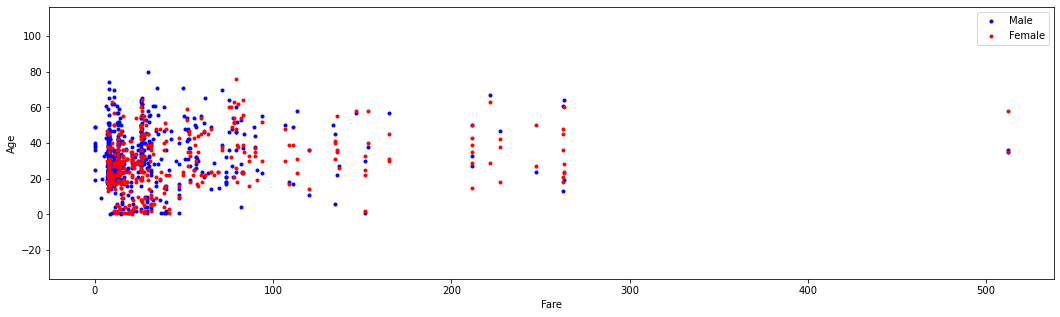

In [10]:
fig = plt.figure(figsize=(18,5))
plt.plot(male.fare, male.age, '.b', label='Male')
plt.plot(female.fare, female.age, '.r', label='Female')
plt.axis('equal')
plt.xlabel('Fare')
plt.ylabel('Age')
leg = plt.legend()

---
---